<a href="https://colab.research.google.com/github/onlyreynaldo/DS4B-101-R-Business-Analysis/blob/master/Clase_del_dia_27_de_Oct.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
pasta_raiz = 'drive/My Drive/datasets'

In [6]:
import numpy as np
import pandas as pd

In [7]:
dados = pd.read_csv('drive/My Drive/datasets/entregas.csv', sep=',')

In [8]:
instituicao = "labdata"
"Aprendendo clusterizacao na {instituicao}".format(instituicao=instituicao)

'Aprendendo clusterizacao na labdata'

In [7]:
f"Aprendendo Clusteruzacao na {instituicao}"

'Aprendendo Clusteruzacao na labdata'

In [9]:
dados = pd.read_csv(f'{pasta_raiz}/entregas.csv', sep=',')

In [10]:
dados.head()

,id_motorista,distancia,tempo
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


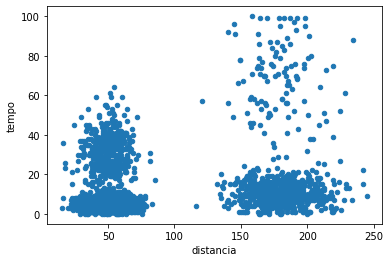

In [12]:
dados.plot(kind='scatter', x='distancia', y='tempo');

In [14]:
# Para ver si tenemos nulos en la base
dados.isnull().sum()

id_motorista    0
distancia       0
tempo           0
dtype: int64

In [16]:
dados.id_motorista.nunique()

4000

In [17]:
dados.drop(['id_motorista'], axis=1)

,distancia,tempo
0,71.24,28.0
1,52.53,25.0
2,64.54,27.0
3,55.69,22.0
4,54.58,25.0
...,...,...
3995,160.04,10.0
3996,176.17,5.0
3997,170.91,12.0
3998,176.14,5.0


In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)

X = dados.drop(['distancia'], axis=1)
X = dados.drop(['id_motorista'], axis=1)

kmeans.fit(X)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [19]:
dados.head()

,id_motorista,distancia,tempo
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


In [21]:
dados.drop('3423313724')

KeyError: ignored

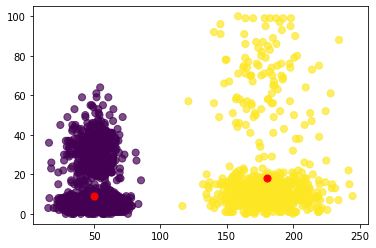

In [27]:
centroides = kmeans.cluster_centers_

import matplotlib.pyplot as plt

plt.scatter(X['distancia'], X['tempo'], c=kmeans.labels_, s= 50, alpha=0.7);
plt.scatter(centroides[:,0], centroides[:,1], c='red', s=50);

In [28]:
dados.assign(cluster_id=kmeans.labels_)

,id_motorista,distancia,tempo,cluster_id
0,3423311935,71.24,28.0,0
1,3423313212,52.53,25.0,0
2,3423313724,64.54,27.0,0
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0
...,...,...,...,...
3995,3423310685,160.04,10.0,1
3996,3423312600,176.17,5.0,1
3997,3423312921,170.91,12.0,1
3998,3423313630,176.14,5.0,1


Ahora con 3 clusters

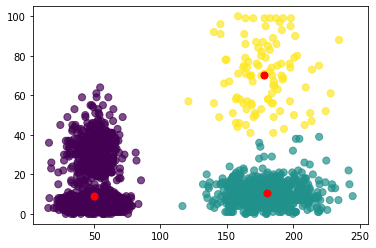

In [29]:
kmeans3 = KMeans(n_clusters=3)
kmeans3.fit(X)
centroides3 = kmeans3.cluster_centers_

plt.scatter(dados.distancia, dados.tempo, 50,kmeans3.labels_, alpha=0.7);
plt.scatter(centroides3[:,0], centroides3[:,1], 50, 'red');

Ahora con 4 clusters

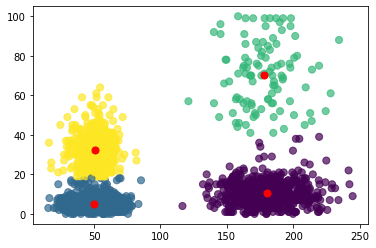

In [34]:
kmeans4 = KMeans(n_clusters=4)
kmeans4.fit(X)
centroides4 = kmeans4.cluster_centers_


plt.scatter(dados.distancia, dados.tempo, 50,kmeans4.labels_, alpha=0.7);
plt.scatter(centroides4[:,0], centroides4[:,1], 50, 'red');

Como saber el k segun el metodo de cotovelo (elbow)

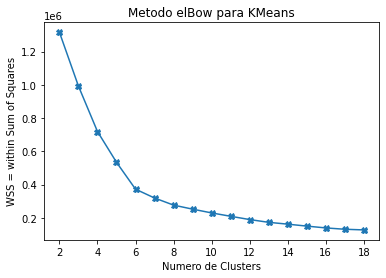

In [37]:
n_clusters = []
wss = [] # within sum of squares

for i in range(2,19):
  kmeans = KMeans(n_clusters=i).fit(X)
  wss.append(kmeans.inertia_)
  n_clusters.append(i)

plt.plot(n_clusters, wss, marker='X');
plt.xlabel('Numero de Clusters');
plt.ylabel('WSS = within Sum of Squares');
plt.title('Metodo elBow para KMeans');

In [40]:
!pip install yellowbrick==1.2

     |████████████████████████████████| 276kB 2.9MB/s 
  Found existing installation: yellowbrick 0.9.1
    Uninstalling yellowbrick-0.9.1:
      Successfully uninstalled yellowbrick-0.9.1


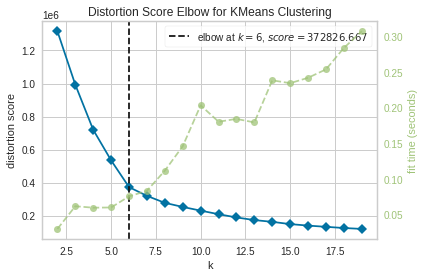

In [11]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

model = KMeans()
visualizer = KElbowVisualizer(model, k=(2, 20))
visualizer.fit(X)
visualizer.show();